# Como os Fatores Socioeconómicos Influenciam a Expectativa de Vida?

* Caracterização do Problema: Determinar a relação entre indicadores socioeconómicos (PIB, escolaridade, rendimento) e a expectativa de vida nos diferentes países.

* Relevância: Compreender esta relação é crucial para desenvolver políticas que promovam o desenvolvimento económico e social como meio para melhorar a saúde pública.

* Agentes Decisores: Governos nacionais, economistas, planejadores urbanos, organizações internacionais.

Auxiliará na alocação eficiente de recursos, direcionando investimentos para áreas que possam gerar maior impacto na saúde da população, como educação e desenvolvimento económico.

---

# Análise Exploratória de Dados (AED)
### Como os Fatores Socioeconómicos Influenciam a Expectativa de Vida?


## Introdução

Este projeto tem como objetivo compreender como os fatores socioeconómicos influenciam a expectativa de vida em diferentes países. A análise exploratória de dados (AED) será conduzida para identificar padrões, tendências e possíveis relações entre variáveis chave, fornecendo insights relevantes para os agentes decisores.

### **Problema de Decisão**
- **Caracterização**: Determinar como indicadores socioeconómicos, como PIB, escolaridade e rendimento, impactam a expectativa de vida.
- **Relevância**: A compreensão desta relação é essencial para desenvolver políticas públicas que melhorem a saúde da população.
- **Agentes Decisores**:
  - Governos nacionais
  - Economistas
  - Planejadores urbanos
  - Organizações internacionais


---

# Preparação do Dataset


In [1]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregar o dataset
data = pd.read_csv("./data/Life_Expectancy_Data.csv")

# Selecionar colunas relevantes
selected_columns = [
    'Life expectancy ', 'GDP', 'Schooling', 'Alcohol', 'percentage expenditure', 
    'Adult Mortality', 'Status'
]
prepared_data = data[selected_columns].copy()

# Tratar valores ausentes
prepared_data['GDP'] = prepared_data['GDP'].fillna(prepared_data['GDP'].median())
prepared_data['Schooling'] = prepared_data['Schooling'].fillna(prepared_data['Schooling'].median())
prepared_data['Alcohol'] = prepared_data['Alcohol'].fillna(prepared_data['Alcohol'].median())

# Converter a coluna categórica 'Status' em numérica
prepared_data['Status'] = prepared_data['Status'].map({'Developing': 0, 'Developed': 1})

# Separar variáveis dependentes e independentes
X = prepared_data.drop(columns=['Life expectancy '])
y = prepared_data['Life expectancy ']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


---
# Modelos Supervisionados:

- Regressão Linear
- Random Forest Regressor
- Gradient Boosting Regressor

Resultados dos Modelos:
                             Model        MSE        R2
0          GLM (Linear Regression)  21.210636  0.701353
1  GBM (Gradient Boosting Machine)  10.241559  0.855798
2    DRF (Random Forest Regressor)   7.014058  0.901242
3  XGB (Extreme Gradient Boosting)   7.976501  0.887690
4         DL (Deep Learning - MLP)  11.863674  0.832959


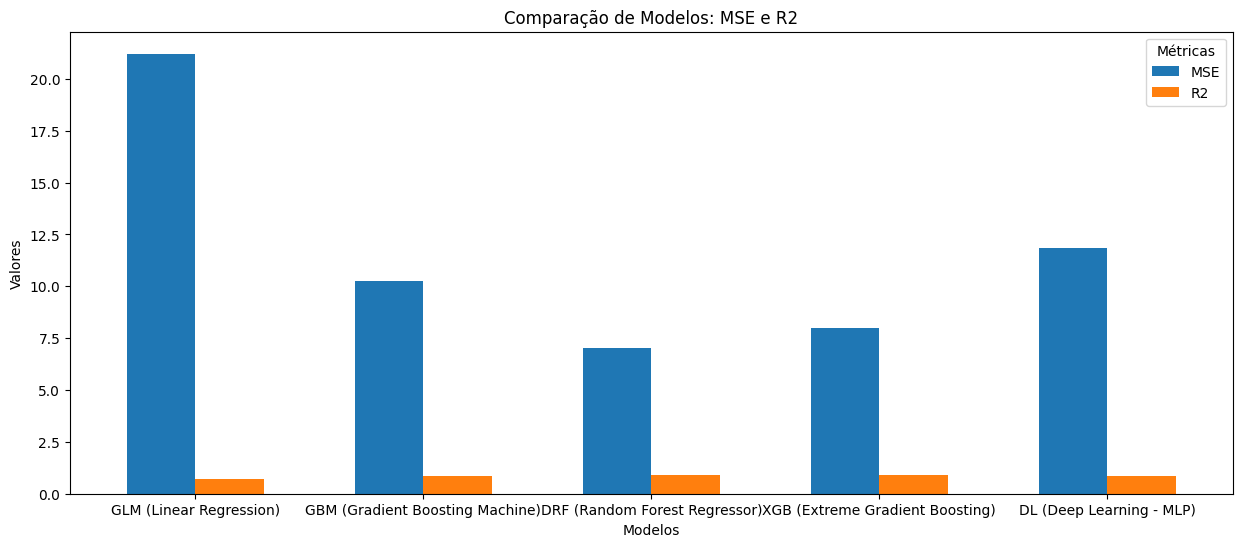

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Modelos de Machine Learning
models = {
    "GLM (Linear Regression)": LinearRegression(),
    "GBM (Gradient Boosting Machine)": GradientBoostingRegressor(random_state=42),
    "DRF (Random Forest Regressor)": RandomForestRegressor(random_state=42),
    "XGB (Extreme Gradient Boosting)": XGBRegressor(random_state=42),
    "DL (Deep Learning - MLP)": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

# Dicionário para armazenar os resultados
results = {"Model": [], "MSE": [], "R2": []}

# Treinar e avaliar os modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Salvar os resultados
    results["Model"].append(name)
    results["MSE"].append(mse)
    results["R2"].append(r2)

# Converter para DataFrame
Modeling = pd.DataFrame(results)

# Exibir os resultados
print("Resultados dos Modelos:")
print(Modeling)

# Visualizar os resultados
Modeling.set_index("Model").plot(kind="bar", figsize=(15, 6), width=0.6)
plt.title("Comparação de Modelos: MSE e R2")
plt.ylabel("Valores")
plt.xlabel("Modelos")
plt.xticks(rotation=0)
plt.legend(title="Métricas", loc="best")
plt.show()


In [4]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar os modelos
drf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Treinar os modelos
drf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Fazer previsões
y_pred_drf = drf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Avaliar o desempenho
mse_drf = mean_squared_error(y_test, y_pred_drf)
r2_drf = r2_score(y_test, y_pred_drf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"DRF - MSE: {mse_drf:.2f}, R2: {r2_drf:.2f}")
print(f"XGB - MSE: {mse_xgb:.2f}, R2: {r2_xgb:.2f}")


DRF - MSE: 7.01, R2: 0.90
XGB - MSE: 7.98, R2: 0.89


In [5]:
# Importância das variáveis - DRF
drf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': drf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importância das Variáveis - DRF")
print(drf_feature_importance)

# Importância das variáveis - XGB
xgb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportância das Variáveis - XGB")
print(xgb_feature_importance)


Importância das Variáveis - DRF
                  Feature  Importance
4         Adult Mortality    0.641923
1               Schooling    0.265812
2                 Alcohol    0.040341
3  percentage expenditure    0.026464
0                     GDP    0.024395
5                  Status    0.001065

Importância das Variáveis - XGB
                  Feature  Importance
4         Adult Mortality    0.628866
1               Schooling    0.236936
5                  Status    0.060487
2                 Alcohol    0.035284
3  percentage expenditure    0.023675
0                     GDP    0.014753


In [6]:
# Exemplo de novo dado para prever
new_data = pd.DataFrame({
    'GDP': [15000],
    'Schooling': [12],
    'Alcohol': [5],
    'Percentage expenditure': [10],
    'Adult Mortality': [150],
    'Status': [1]  # 1 para "Developed", 0 para "Developing"
})

# Previsões
pred_drf = drf.predict(new_data)
pred_xgb = xgb.predict(new_data)

print(f"Previsão - DRF: {pred_drf[0]:.2f}")
print(f"Previsão - XGB: {pred_xgb[0]:.2f}")


Previsão - DRF: 46.76
Previsão - XGB: 50.61


c:\Users\avlal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [7]:
# Previsões usando os dados reais do conjunto de teste
y_pred_drf_test = drf.predict(X_test)
y_pred_xgb_test = xgb.predict(X_test)

# Comparar valores previstos com valores reais
results_comparison = pd.DataFrame({
    'Real Life Expectancy': y_test,
    'Predicted (DRF)': y_pred_drf_test,
    'Predicted (XGB)': y_pred_xgb_test
}).reset_index(drop=True)

# Exibir as primeiras previsões
print("Comparação entre valores reais e previstos:")
print(results_comparison.head())

# Avaliar os erros médios para cada modelo no conjunto de teste
mse_drf_test = mean_squared_error(y_test, y_pred_drf_test)
r2_drf_test = r2_score(y_test, y_pred_drf_test)

mse_xgb_test = mean_squared_error(y_test, y_pred_xgb_test)
r2_xgb_test = r2_score(y_test, y_pred_xgb_test)

print(f"\nDesempenho - DRF: MSE={mse_drf_test:.2f}, R²={r2_drf_test:.2f}")
print(f"Desempenho - XGB: MSE={mse_xgb_test:.2f}, R²={r2_xgb_test:.2f}")


Comparação entre valores reais e previstos:
   Real Life Expectancy  Predicted (DRF)  Predicted (XGB)
0                  67.5           68.591        68.853424
1                  73.8           74.328        74.288269
2                  79.1           79.892        79.688423
3                  54.9           53.062        53.441566
4                  48.6           50.149        49.775082

Desempenho - DRF: MSE=7.01, R²=0.90
Desempenho - XGB: MSE=7.98, R²=0.89


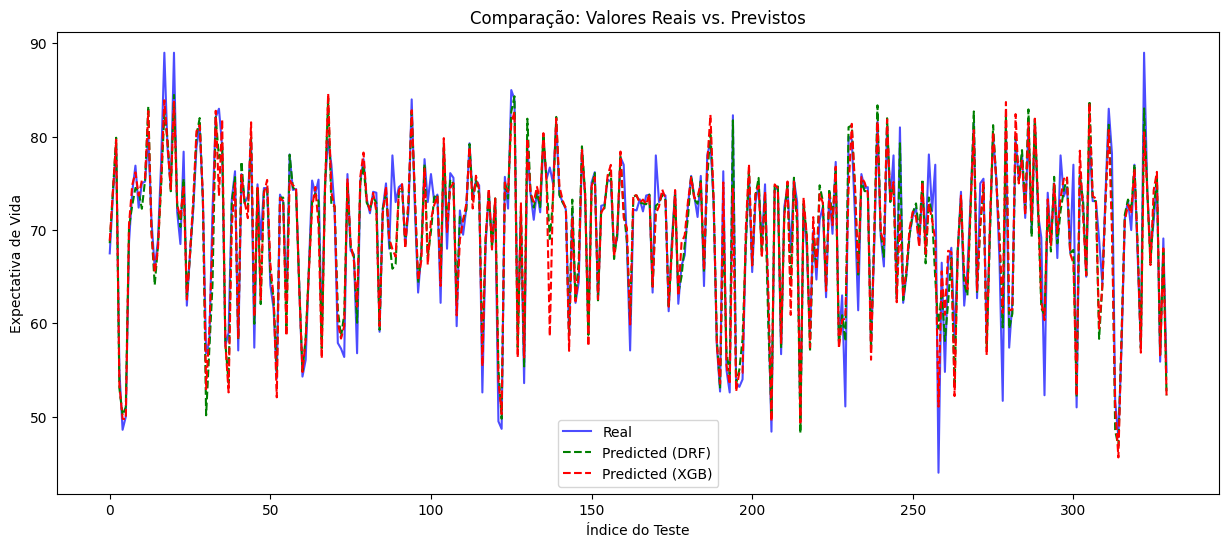

In [8]:
# Comparação entre valores reais e previstos
plt.figure(figsize=(15, 6))

plt.plot(y_test.values, label='Real', color='blue', alpha=0.7)
plt.plot(y_pred_drf_test, label='Predicted (DRF)', color='green', linestyle='dashed')
plt.plot(y_pred_xgb_test, label='Predicted (XGB)', color='red', linestyle='dashed')

plt.title('Comparação: Valores Reais vs. Previstos')
plt.xlabel('Índice do Teste')
plt.ylabel('Expectativa de Vida')
plt.legend()
plt.show()


In [9]:
# Identificar instâncias com maiores discrepâncias
results_comparison['Difference (DRF)'] = abs(results_comparison['Real Life Expectancy'] - results_comparison['Predicted (DRF)'])
results_comparison['Difference (XGB)'] = abs(results_comparison['Real Life Expectancy'] - results_comparison['Predicted (XGB)'])

# Top 5 discrepâncias
print("Top 5 discrepâncias - DRF:")
print(results_comparison.nlargest(5, 'Difference (DRF)'))

print("\nTop 5 discrepâncias - XGB:")
print(results_comparison.nlargest(5, 'Difference (XGB)'))


Top 5 discrepâncias - DRF:
     Real Life Expectancy  Predicted (DRF)  Predicted (XGB)  Difference (DRF)  \
258                  44.0           59.447        51.075787            15.447   
257                  77.0           64.772        68.937843            12.228   
88                   78.0           65.855        67.950302            12.145   
308                  69.0           58.343        59.445702            10.657   
300                  77.0           67.877        66.448921             9.123   

     Difference (XGB)  
258          7.075787  
257          8.062157  
88          10.049698  
308          9.554298  
300         10.551079  

Top 5 discrepâncias - XGB:
     Real Life Expectancy  Predicted (DRF)  Predicted (XGB)  Difference (DRF)  \
137                  76.7           69.047        58.630585             7.653   
300                  77.0           67.877        66.448921             9.123   
88                   78.0           65.855        67.950302            

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Selecionar colunas numéricas relevantes
numeric_columns = ['GDP', 'Schooling', 'Alcohol', 'percentage expenditure', 'Adult Mortality']
data_pca = prepared_data[numeric_columns]

# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Exibir as primeiras linhas normalizadas
print("Dados normalizados para PCA:")
print(pd.DataFrame(data_scaled, columns=numeric_columns).head())


Dados normalizados para PCA:
        GDP  Schooling   Alcohol  percentage expenditure  Adult Mortality
0 -0.434239  -0.722799 -1.122948               -0.356909         0.756629
1 -0.431760  -0.758583 -1.122948               -0.355633         0.820490
2 -0.430100  -0.794367 -1.122948               -0.355806         0.796542
3 -0.426769  -0.830151 -1.122948               -0.352983         0.828472
4 -0.479628  -0.937503 -1.122948               -0.393403         0.852420


In [12]:
# Inicializar o PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais

# Ajustar o PCA aos dados normalizados
pca_result = pca.fit_transform(data_scaled)

# Exibir variância explicada
explained_variance = pca.explained_variance_ratio_
print("\nVariância explicada por componente principal:")
print(explained_variance)

# Converter o resultado para um DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print("\nComponentes principais:")
print(pca_df.head())



Variância explicada por componente principal:
[0.56783316 0.1979111 ]

Componentes principais:
        PC1       PC2
0 -1.427007  0.646599
1 -1.459479  0.704423
2 -1.468250  0.704482
3 -1.490445  0.742716
4 -1.594482  0.762759


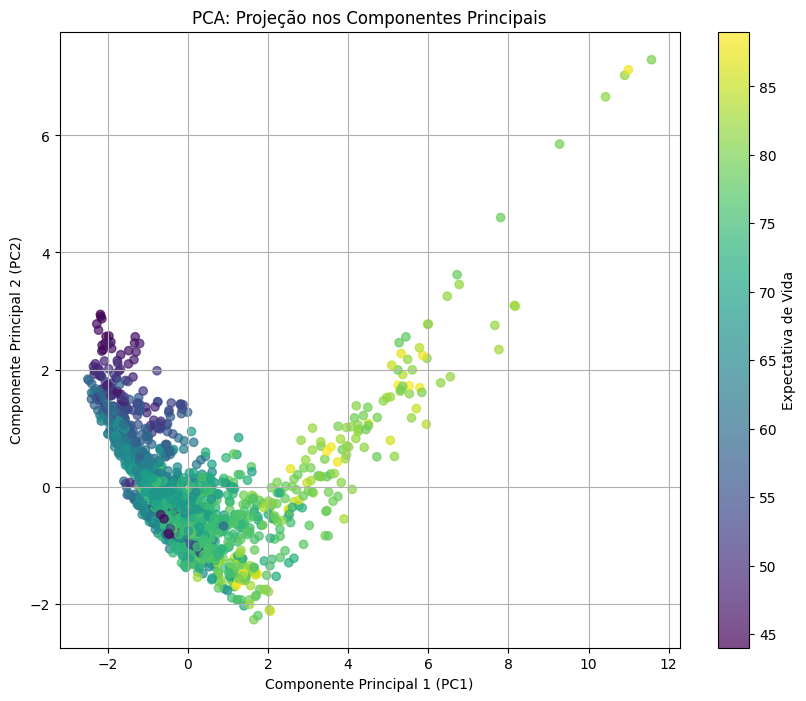

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c=prepared_data['Life expectancy '], cmap='viridis')
plt.colorbar(label='Expectativa de Vida')
plt.title('PCA: Projeção nos Componentes Principais')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)
plt.show()


In [15]:
# Importância das variáveis - DRF
drf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': drf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Importância das Variáveis - DRF:")
print(drf_feature_importance)

# Importância das variáveis - GBM
gbm_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nImportância das Variáveis - XGB:")
print(gbm_feature_importance)


Importância das Variáveis - DRF:
                  Feature  Importance
4         Adult Mortality    0.641923
1               Schooling    0.265812
2                 Alcohol    0.040341
3  percentage expenditure    0.026464
0                     GDP    0.024395
5                  Status    0.001065

Importância das Variáveis - XGB:
                  Feature  Importance
4         Adult Mortality    0.628866
1               Schooling    0.236936
5                  Status    0.060487
2                 Alcohol    0.035284
3  percentage expenditure    0.023675
0                     GDP    0.014753


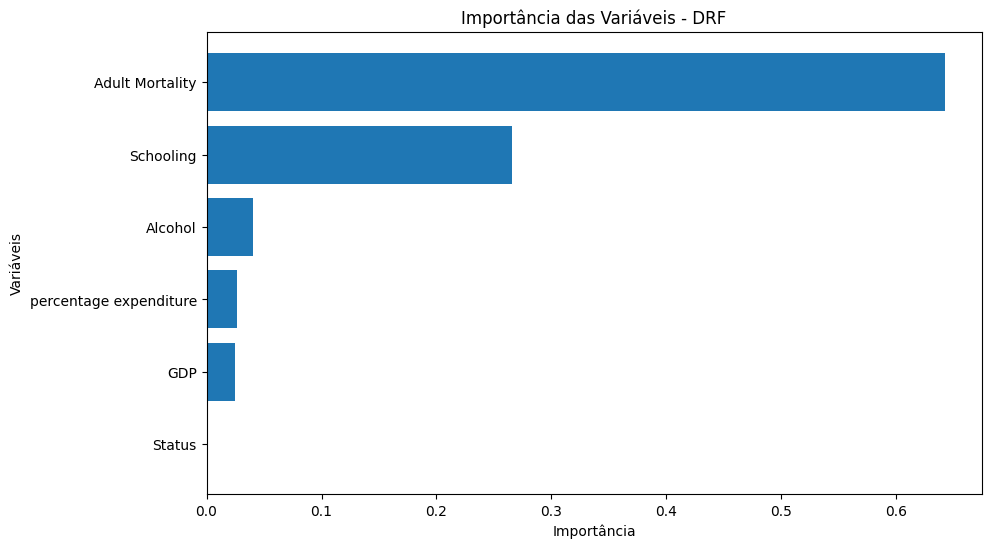

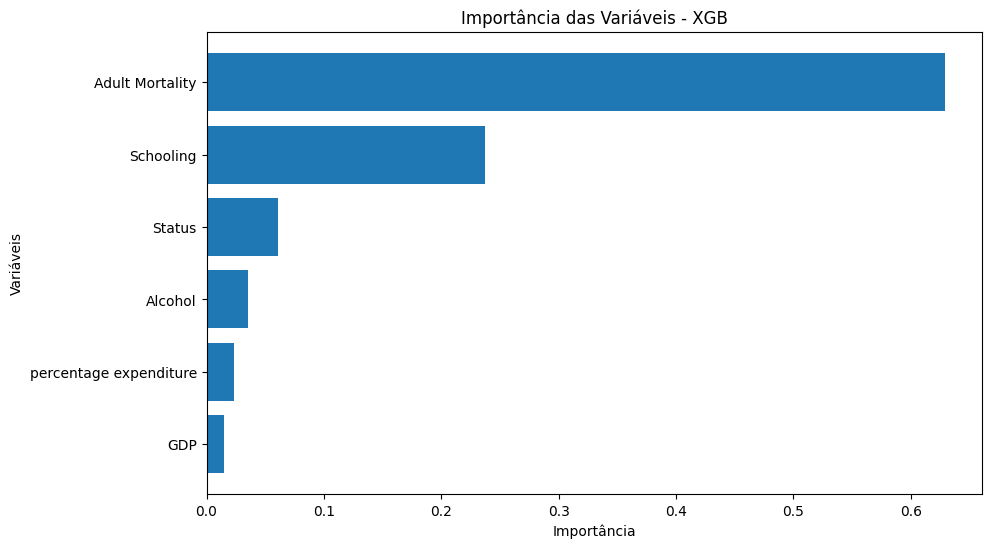

In [16]:
# Visualizar a importância das variáveis - DRF
plt.figure(figsize=(10, 6))
plt.barh(drf_feature_importance['Feature'], drf_feature_importance['Importance'])
plt.title("Importância das Variáveis - DRF")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.gca().invert_yaxis()
plt.show()

# Visualizar a importância das variáveis - GBM
plt.figure(figsize=(10, 6))
plt.barh(gbm_feature_importance['Feature'], gbm_feature_importance['Importance'])
plt.title("Importância das Variáveis - XGB")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.gca().invert_yaxis()
plt.show()


In [17]:
# Treinar o modelo GLM
glm = LinearRegression()
glm.fit(X_train, y_train)

# Coeficientes do modelo
glm_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': glm.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Coeficientes - GLM:")
print(glm_coefficients)


Coeficientes - GLM:
                  Feature  Coefficient
1               Schooling     4.550714
3  percentage expenditure     0.489312
5                  Status     0.395968
0                     GDP     0.304232
2                 Alcohol    -0.625626
4         Adult Mortality    -4.140742


In [18]:
# Importância das variáveis nos componentes principais
pca_components = pd.DataFrame(
    pca.components_, 
    columns=numeric_columns, 
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print("Contribuição das variáveis nos componentes principais:")
print(pca_components.T)


Contribuição das variáveis nos componentes principais:
                             PC1       PC2
GDP                     0.523039  0.415288
Schooling               0.456453 -0.417235
Alcohol                 0.421866 -0.175946
percentage expenditure  0.509818  0.452218
Adult Mortality        -0.283187  0.646524


In [19]:
from sklearn.feature_selection import RFE

# Usar um modelo como base para a seleção (exemplo: Random Forest)
selector = RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=5)
selector = selector.fit(X_train, y_train)

# Variáveis selecionadas
selected_features = X.columns[selector.support_]
print("Variáveis Selecionadas - RFE:")
print(selected_features)


Variáveis Selecionadas - RFE:
Index(['GDP', 'Schooling', 'Alcohol', 'percentage expenditure',
       'Adult Mortality'],
      dtype='object')
